# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='env_v1/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()



### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
from numpy.random import choice
import copy

In [2]:
env = UnityEnvironment(file_name='env_v1/Reacher.exe')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [27]:
env.close()

In [3]:
class Actor(nn.Module):
    def __init__(self, nA, nS, seed):
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.dense1 = nn.Linear(nS, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dense2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dense3 = nn.Linear(128, nA)
    
    def forward(self, state, training=True):
        x = F.leaky_relu(self.bn1(self.dense1(state)))
        x = F.leaky_relu(self.bn2(self.dense2(x)))
        x = F.tanh(self.dense3(x))
        return x

In [4]:
class Critic(nn.Module):
    def __init__(self, nA, nS, seed):
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.dense1 = nn.Linear(nS, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dense2 = nn.Linear(nA+64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dense3 = nn.Linear(128, 1)
    
    def forward(self, state, action, training=True):
        x = F.leaky_relu(self.bn1(self.dense1(state))).float()
        x = F.leaky_relu(self.bn2(self.dense2(torch.cat((x, action.float()), 1))))
        x = F.tanh(self.dense3(x))
        return x

In [5]:
class ReplayBuffer:
    def __init__(self, buffer_size, batch_size, nA, nS, seed, prioritized=False, e=0.1):
        self.e=e
        self.nA = nA
        self.nS = nS
        self.memory = deque(maxlen=buffer_size)
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.prioritized = prioritized
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done", "tdE"])
        
    def add(self, state, action, reward, next_state, done, tdE):
        e = self.experience(state, action, reward, next_state, done, tdE)
        self.memory.append(e)
        
    def sample(self, a=0):
#         a = 0 if not self.prioritized
#         experiences = random.sample(self.memory, k=self.batch_size)
#         _, _, _, _, _, tdEs = zip(*self.memory)
#         tdEs = np.array(list(tdEs))
#         tdErrors = (np.abs(tdEs) + self.e)**a
#         tdErrorsSum = np.sum(tdErrors)
#         probabilities = tdErrors / tdErrorsSum
#         experiencesIdx = choice(np.arange(len(tdEs)), self.batch_size, p=probabilities)
#         experiences = [self.memory[c] for c in experiencesIdx]

#         probabilities = torch.from_numpy(np.vstack(probabilities)).float().to(device)
        probabilities = None
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones, probabilities)
        
    def __len__(self):
        return len(self.memory)

In [6]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

In [7]:
noooise = OUNoise(4, 0)

In [8]:
noooise.sample()

array([0.16888437, 0.15159088, 0.08411432, 0.05178335])

In [9]:
BUFFER_SIZE = int(1e5)  
BATCH_SIZE = 128   
GAMMA = 0.99       
TAU = 1e-3      
LR_ACTOR = 1e-4       
LR_CRITIC = 3e-4     
WEIGHT_DECAY = 0 
UPDATE_EVERY = 10 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
class Agent():
    def __init__(self, nA, nS, seed, prioritized=False):
        self.prioritized = prioritized
        self.state_size = nS
        self.action_size = nA
        
        self.critic_local = Critic(nA, nS, seed).to(device)
        self.critic_target = Critic(nA, nS, seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        
        self.actor_local = Actor(nA, nS, seed).to(device)
        self.actor_target = Actor(nA, nS, seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)
        
        self.t_step = 0
        self.ouNoise = OUNoise(nA, seed)
        
        self.memory = ReplayBuffer(BUFFER_SIZE, BATCH_SIZE, nA, nS, seed, prioritized=False, e=0.1)
        
    def step(self, state, action, reward, next_state, done, a=0, b=1):
        tdE = 1.0
        self.memory.add(state, action, reward, next_state, done, tdE)
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        
        if(self.t_step == 0):
            if(len(self.memory) > BATCH_SIZE):
                experiences = self.memory.sample(a)
                self.learn(experiences, GAMMA, b)
                
    def act(self, state, training=True):
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action_values = self.actor_local(state)
        self.actor_local.train()
        av2 =action_values.cpu().numpy()
        if(training):
            av2 += self.ouNoise.sample()
        return(np.clip(av2, -1, 1))
        
    
    def learn(self, experiences, gamma, b):
        states, actions, rewards, next_states, dones, probabilities = experiences
        
        next_actions = self.actor_target(next_states)
        next_Qvalues = self.critic_target(next_states, next_actions)
        
        Qtargets = rewards + (GAMMA*next_Qvalues * (1-dones))
        
        Qexpected = self.critic_local(states, actions)
        
        loss_critic = F.mse_loss(Qexpected, Qtargets)
        self.critic_optimizer.zero_grad()
        loss_critic.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()
        
        actions_pred = self.actor_local(states)
        loss_actor = -self.critic_local(states, actions_pred).mean()
        
        self.actor_optimizer.zero_grad()
        loss_actor.backward()
        self.actor_optimizer.step()
        
        self.soft_update(self.critic_local, self.critic_target, TAU)  
        self.soft_update(self.actor_local, self.actor_target, TAU)  
        
        
    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
    
    def reset(self):
        self.ouNoise.reset()
        

In [11]:
agent = Agent(action_size, state_size, seed=0)

In [12]:
actions = []

In [13]:
def ddpg(n_episodes=1000, max_t=2000, print_every=100):
    scores_all = []
    score_window = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations
        scores = np.zeros(num_agents)
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations   
            reward = env_info.rewards
            dones = env_info.local_done
            scores += env_info.rewards
            agent.step(state, action, env_info.rewards[0], next_state, dones)
            state = next_state
            if(np.any(dones)):
                break
        
        score_mean = np.mean(scores)
        score_window.append(score_mean)
        scores_all.append(score_mean)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(score_window)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(score_window)))
    
    env.close()
    return scores

In [ ]:
scores = ddpg()

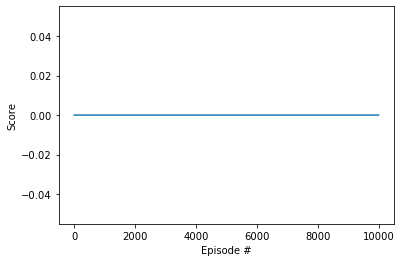

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [20]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.

In [ ]:
env_info = env.step([[1,1,1,1]])[brain_name]

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))